In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append("../scripts")
from smi_processing import standardise_smiles

datapath = "../data"

0
41 214 0.19158878504672897


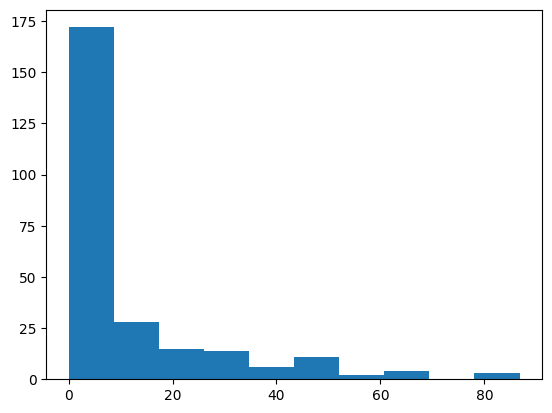

In [21]:
df = pd.read_csv(os.path.join(datapath, "raw", "sarathy2016.csv"))
df["st_smiles"] = standardise_smiles(df["smiles"].tolist())
print(len(df[df["st_smiles"].isna()]))
df = df[["st_smiles", "fu"]]
df["fu"] = pd.to_numeric(df["fu"], errors="coerce")
plt.hist(df["fu"])

cutoff = 25
nactives = len(df[df["fu"]>=cutoff])
ninactives = len(df[df["fu"]<cutoff])
print(nactives, ninactives, nactives/ninactives)

df["bin"]=[1 if x>=cutoff else 0 for x in df["fu"].tolist()]
df[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "sarathy2016.csv"), index=False)

In [ ]:
df = pd.read_csv(os.path.join(datapath, "raw", "janardhan2016.csv"))
print("total compounds: ", len(df))
print("high: ",len(df[df["pMIC"]>=7]))
print("moderate: ",len(df[(df["pMIC"] > 5) & (df["pMIC"] < 7)]))
print("low: ",len(df[df["pMIC"]<=5]))

#real negatives: Low activity (pMIC <= 5, because they come from the high enzymatic actives IC50>6)
#discard in between compounds

df = df[(df["pMIC"]<=5) | (df["pMIC"]>= 7)]
print(len(df))
df["st_smiles"]=standardise_smiles(df["smiles"].tolist())
df = df[~df["st_smiles"].isna()]
print(len(df))

cutoff = 7
nactives = len(df[df["pMIC"]>=cutoff])
ninactives = len(df[df["pMIC"]<cutoff])
print(nactives, ninactives, nactives/ninactives)

df["bin"]=[1 if x>=cutoff else 0 for x in df["pMIC"].tolist()]
df[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "janardhan2016.csv"), index=False)

total compounds:  357
high:  278
moderate:  24
low:  55
333


[17:04:01] SMILES Parse Error: unclosed ring for input: 'COC1CCC(CC1)\N=C\2/C=C3N(c4ccc(Cl)cc4)c5ccccc5N=C3C=C2Nccccnc6C'
[17:04:01] SMILES Parse Error: extra close parentheses while parsing: [O-][N+](=O)c1cn2C[C@@H](COc2n1)OCCCC#Cc3ccc(cc3)c4ccc(OC(F)F)F)cc4
[17:04:01] SMILES Parse Error: check for mistakes around position 64:
[17:04:01] c(cc3)c4ccc(OC(F)F)F)cc4
[17:04:01] ~~~~~~~~~~~~~~~~~~~~^
[17:04:01] SMILES Parse Error: Failed parsing SMILES '[O-][N+](=O)c1cn2C[C@@H](COc2n1)OCCCC#Cc3ccc(cc3)c4ccc(OC(F)F)F)cc4' for input: '[O-][N+](=O)c1cn2C[C@@H](COc2n1)OCCCC#Cc3ccc(cc3)c4ccc(OC(F)F)F)cc4'
[17:04:01] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 30


330
275 55 5.0


In [31]:
df = pd.read_csv(os.path.join(datapath, "raw", "radchenko2023.csv"))
print(len(df))
df["st_smiles"]=standardise_smiles(df["Smiles"].tolist())
df = df[~df["st_smiles"].isna()]
print(len(df))
nactives = len(df[df["MtbPen"]==1])
ninactives = len(df[df["MtbPen"]==0])
print(nactives, ninactives, nactives/ninactives)

df.rename(columns={"MtbPen": "bin"}, inplace=True)
df[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "radchenko2023.csv"), index=False)

5371


[17:10:09] Can't kekulize mol.  Unkekulized atoms: 3 8
[17:10:11] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 6 10
[17:10:12] Can't kekulize mol.  Unkekulized atoms: 3 10
[17:10:12] Can't kekulize mol.  Unkekulized atoms: 3 10
[17:10:12] Can't kekulize mol.  Unkekulized atoms: 3 10
[17:10:15] Can't kekulize mol.  Unkekulized atoms: 3 15
[17:10:15] Can't kekulize mol.  Unkekulized atoms: 3 15
[17:10:15] Can't kekulize mol.  Unkekulized atoms: 3 8


5371
2671 2700 0.9892592592592593


dict_keys(['1200', '380', '40'])
1564
1564
702 862 0.814385150812065
688 876 0.7853881278538812


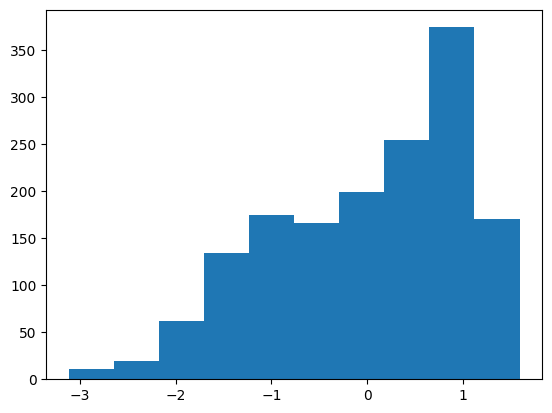

In [ ]:
df = pd.read_excel(os.path.join(datapath, "raw", "lepori2025.xlsx"), sheet_name=None)
print(df.keys())
dfs = []
for k,v in df.items():
    dfs += [v]
df = pd.concat(dfs)
print(len(df))
df["st_smiles"]=standardise_smiles(df["smiles"].tolist())
df = df[~df["st_smiles"].isna()]
print(len(df))
plt.hist(df["mtb_resid_std"])
cutoff = 0
nactives = len(df[df["mtb_resid_std"]<=cutoff])
ninactives = len(df[df["mtb_resid_std"]>cutoff])
print(nactives, ninactives, nactives/ninactives)
nactives = len(df[df["msm_resid_std"]<=cutoff])
ninactives = len(df[df["msm_resid_std"]>cutoff])
print(nactives, ninactives, nactives/ninactives)

df_mtb = df.copy()
df_mtb["bin"]  = [1 if x<=cutoff else 0 for x in df_mtb["mtb_resid_std"].tolist()]
df_mtb[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "lepori2025_mtb.csv"), index=False)

df_msm = df.copy()
df_msm["bin"]  = [1 if x<=cutoff else 0 for x in df_msm["mtb_resid_std"].tolist()]
df_msm[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "lepori2025_msm.csv"), index=False)

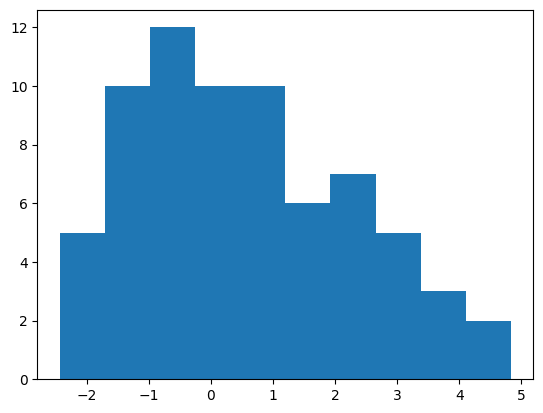

In [10]:
df = pd.read_csv(os.path.join(datapath, "raw", "valitalo2016.csv"))
res_cols = [c for c in df.columns if "log_epr" in c]
median = df[res_cols].apply(np.nanmedian, axis=1)
df["log_epr"] = median
plt.hist(df["log_epr"])
df["bin"]=[1 if x >= 1 else 0 for x in df["log_epr"].tolist()]
df["st_smiles"]=standardise_smiles(df["smiles"].tolist())
df[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "valitalo2016.csv"), index=False)

# Drugs of interest

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append("../scripts")
from smi_processing import standardise_smiles

datapath = "../data"

In [32]:
df1 = pd.read_csv(os.path.join(datapath, "raw", "coad_old_drugs.csv"))
df2 = pd.read_csv(os.path.join(datapath, "raw", "coad_update.csv"))
df2.columns

Index(['name', 'smiles'], dtype='object')

In [33]:
# standardise smiles and save file
df2["smiles"]=standardise_smiles(df2["smiles"].tolist())

In [34]:
from rdkit import Chem
inchikeys = []
for s in df1["smiles"]:
    mol = Chem.MolFromSmiles(s)
    inchikey = Chem.MolToInchiKey(mol)
    inchikeys += [inchikey]
df1["inchikey"]=inchikeys

inchikeys = []
for s in df2["smiles"]:
    mol = Chem.MolFromSmiles(s)
    inchikey = Chem.MolToInchiKey(mol)
    inchikeys += [inchikey]
df2["inchikey"]=inchikeys
print(len(df1), len(set(df1["inchikey"].tolist())),len(df2), len(set(df2["inchikey"].tolist())))

50 50 60 59


In [35]:
dups = df2[df2["inchikey"].duplicated(keep=False)]
print(dups)

                            name  \
3                   Penicillin G   
10  Benzathine benzyl penicillin   

                                               smiles  \
3   CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...   
10  CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...   

                       inchikey  
3   JGSARLDLIJGVTE-MBNYWOFBSA-N  
10  JGSARLDLIJGVTE-MBNYWOFBSA-N  


In [36]:
print(len(set(df1["inchikey"].tolist()).intersection(set(df2["inchikey"].tolist()))))

12


In [37]:
arv =pd.read_csv(os.path.join(datapath, "raw", "arv_drugs.csv"))
mtb =pd.read_csv(os.path.join(datapath, "raw", "mtb_drugs.csv"))

inchikeys = []
for s in arv["smiles"]:
    mol = Chem.MolFromSmiles(s)
    inchikey = Chem.MolToInchiKey(mol)
    inchikeys += [inchikey]
arv["inchikey"]=inchikeys

inchikeys = []
for s in mtb["smiles"]:
    mol = Chem.MolFromSmiles(s)
    inchikey = Chem.MolToInchiKey(mol)
    inchikeys += [inchikey]
mtb["inchikey"]=inchikeys

In [38]:
print(set(df2["inchikey"].tolist()).intersection(set(mtb["inchikey"].tolist())))
print(set(df2["inchikey"].tolist()).intersection(set(arv["inchikey"].tolist())))

{'FABPRXSRWADJSP-MEDUHNTESA-N'}
set()


In [39]:
# Save without duplications
df2["indication"]= "other"
print(df2.shape)
df2 = df2.drop_duplicates(subset=["smiles"], keep="first")
print(df2.shape)
df2 = df2[df2["inchikey"]!="FABPRXSRWADJSP-MEDUHNTESA-N"]
print(df2.shape)
df2[["name", "smiles", "indication"]].to_csv(os.path.join(datapath, "raw", "coad_drugs.csv"), index=False)

(60, 4)
(59, 4)
(58, 4)


In [41]:
# prepare document for entry calculation

datasets = ["arv", "mtb", "coad", "coad_old"]

for d in datasets:
    df = pd.read_csv(os.path.join(datapath, "raw", f"{d}_drugs.csv"))
    df["name"] = df["name"].str.replace(r"\s+", "_", regex=True)
    df[["smiles","name"]].to_csv(os.path.join(datapath, "processed", f"{d}_smi2name.csv"), sep=" ",header=False, index=False)


In [42]:
# create lists for Ersilia predictions
for d in ["arv", "coad", "mtb", "coad_old"]:
    df = pd.read_csv(os.path.join(datapath, "raw", f"{d}_drugs.csv"))
    df = df[["smiles"]]
    df.to_csv(os.path.join(datapath, "processed", f"{d}_smiles.csv"), index=False)